In [47]:
from PIL import Image
import urllib.request
from io import BytesIO
import matplotlib.pyplot as plt
from __future__ import print_function
import cv2 as cv
import numpy as np # Import numpy
import cv2 as cv
import matplotlib.pyplot as plt

In [63]:
# Abre as imagens do git via link
edson = 'https://github.com/caiofalcheti/PDI-UFABC-1Q2026/blob/main/images/edson.jpg?raw=true'
caio = 'https://caiofalcheti.github.io/caio_selfie.jpg?raw=true'
nicolas = 'https://caiofalcheti.github.io/PDI-UFABC-1Q2026/images/Nicolas.jpg?raw=true'

try:
    with urllib.request.urlopen(edson) as url1:
        f1 = BytesIO(url1.read())
    with urllib.request.urlopen(caio) as url2:
        f2 = BytesIO(url2.read())
    with urllib.request.urlopen(nicolas) as url3:
        f3 = BytesIO(url3.read())

    img_edson = Image.open(f1)
    img_caio = Image.open(f2)
    img_nic = Image.open(f3)

    img_edson.show()
    img_caio.show()
    img_nic.show()

except Exception as e:
    print(f"Error loading image from URL: {e}")
    print("Please ensure the URL is a raw image URL (ends with ?raw=true or is from raw.githubusercontent.com) and is accessible.")

Error loading image from URL: HTTP Error 404: Not Found
Please ensure the URL is a raw image URL (ends with ?raw=true or is from raw.githubusercontent.com) and is accessible.


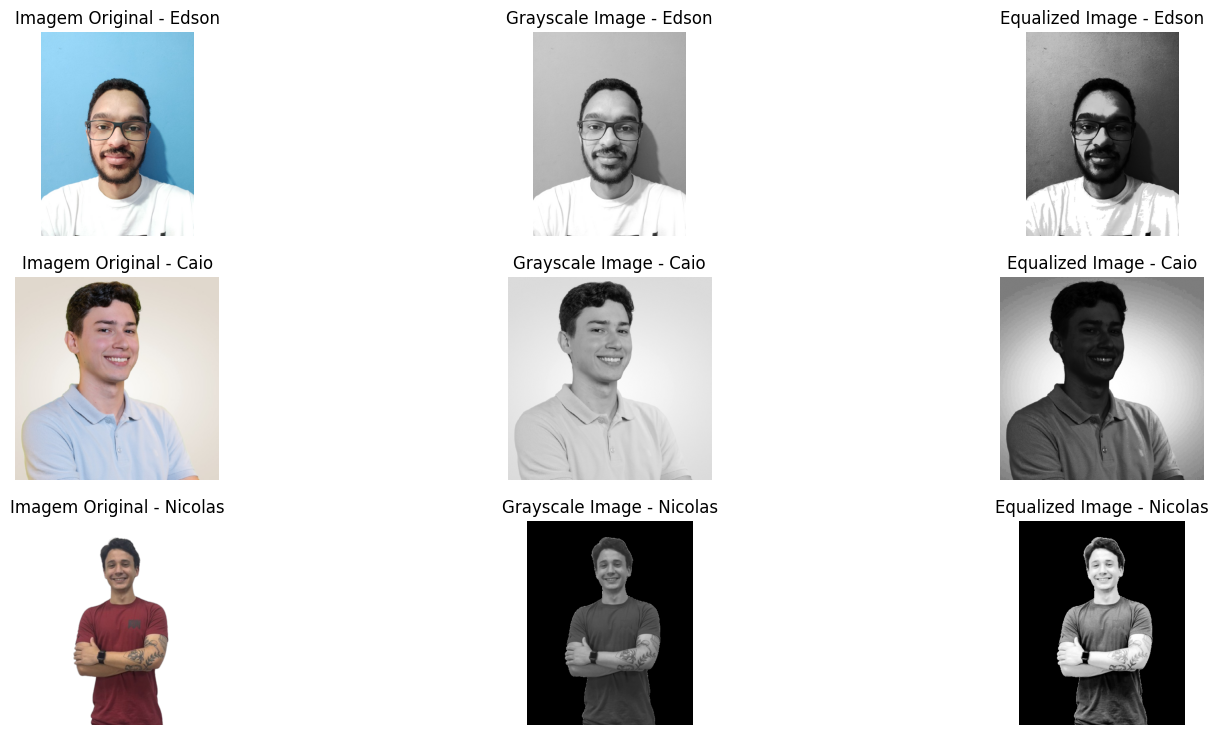

In [64]:
# Convert PIL Image 'img' to numpy array for OpenCV
# PIL images are typically RGB. OpenCV functions often expect BGR or a specific color conversion code.
img_np1 = np.array(img_edson)
img_np2 = np.array(img_caio)
img_np3 = np.array(img_nic)

# Convert original image to grayscale for histogram equalization
# Assuming 'img_np' is RGB from PIL, convert directly to grayscale using COLOR_RGB2GRAY
src_gray1 = cv.cvtColor(img_np1, cv.COLOR_RGB2GRAY)
src_gray2 = cv.cvtColor(img_np2, cv.COLOR_RGB2GRAY)
src_gray3 = cv.cvtColor(img_np3, cv.COLOR_RGB2GRAY)

# Apply histogram equalization to the grayscale image
dst1 = cv.equalizeHist(src_gray1)
dst2 = cv.equalizeHist(src_gray2)
dst3 = cv.equalizeHist(src_gray3)

#EDSON
plt.figure(figsize=(18, 9)) # Adjust figure size for better display
plt.subplot(3, 3, 1)
# Display original image. img_np is already RGB, so no BGR2RGB conversion is needed for matplotlib
plt.imshow(img_np1)
plt.title('Imagem Original - Edson')
plt.axis('off') # Hide axes ticks and labels

#plt.figure(figsize=(6, 6)) # Adjust figure size for better display
plt.subplot(3, 3, 2)
plt.imshow(src_gray1, cmap='gray')
plt.title('Grayscale Image - Edson')
plt.axis('off')

#plt.figure(figsize=(6, 6)) # Adjust figure size for better display
plt.subplot(3, 3, 3)
plt.imshow(dst1, cmap='gray') # Display grayscale equalized image
plt.title('Equalized Image - Edson')
plt.axis('off') # Hide axes ticks and labels

#CAIO
#plt.figure(figsize=(6, 6)) # Adjust figure size for better display
plt.subplot(3, 3, 4)
# Display original image. img_np is already RGB, so no BGR2RGB conversion is needed for matplotlib
plt.imshow(img_np2)
plt.title('Imagem Original - Caio')
plt.axis('off') # Hide axes ticks and labels

#plt.figure(figsize=(6, 6)) # Adjust figure size for better display
plt.subplot(3, 3, 5)
plt.imshow(src_gray2, cmap='gray')
plt.title('Grayscale Image - Caio')
plt.axis('off')

#plt.figure(figsize=(6, 6)) # Adjust figure size for better display
plt.subplot(3, 3, 6)
plt.imshow(dst2, cmap='gray') # Display grayscale equalized image
plt.title('Equalized Image - Caio')
plt.axis('off') # Hide axes ticks and labels

#NICOLAS
#plt.figure(figsize=(6, 6)) # Adjust figure size for better display
plt.subplot(3, 3, 7)
# Display original image. img_np is already RGB, so no BGR2RGB conversion is needed for matplotlib
plt.imshow(img_np3)
plt.title('Imagem Original - Nicolas')
plt.axis('off') # Hide axes ticks and labels

#plt.figure(figsize=(6, 6)) # Adjust figure size for better display
plt.subplot(3, 3, 8)
plt.imshow(src_gray3, cmap='gray')
plt.title('Grayscale Image - Nicolas')
plt.axis('off')

#plt.figure(figsize=(6, 6)) # Adjust figure size for better display
plt.subplot(3, 3, 9)
plt.imshow(dst3, cmap='gray') # Display grayscale equalized image
plt.title('Equalized Image - Nicolas')
plt.axis('off') # Hide axes ticks and labels

plt.show()

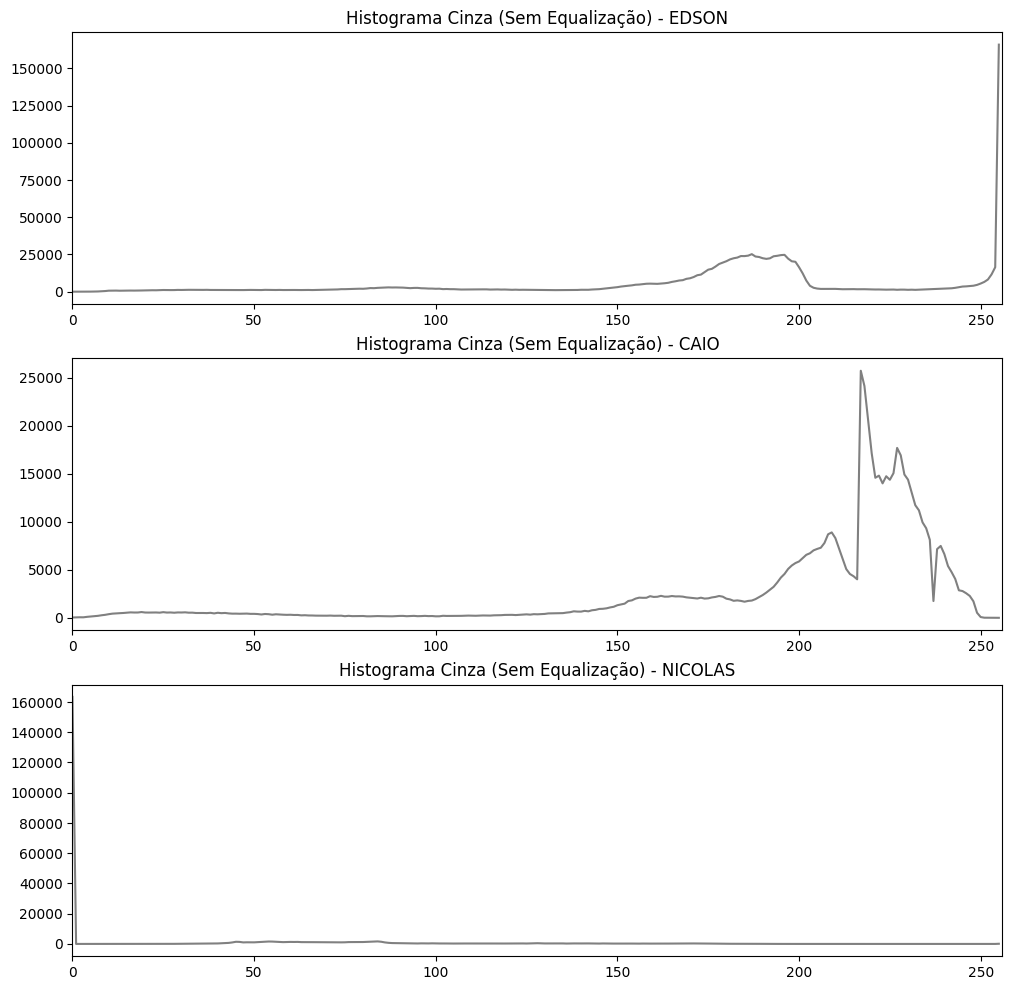

In [65]:
##EDSON
# 1. Calcular o histograma da imagem em tons de cinza
hist1 = cv.calcHist([src_gray1], [0], None, [256], [0, 256])
hist2 = cv.calcHist([src_gray2], [0], None, [256], [0, 256])
hist3 = cv.calcHist([src_gray3], [0], None, [256], [0, 256])

# 2. Criar uma figura para o plot usando matplotlib.pyplot e definir um tamanho apropriado
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
# 3. Plotar o histograma calculado
plt.plot(hist1, color='gray')
# 4. Adicionar um título ao plot
plt.title('Histograma Cinza (Sem Equalização) - EDSON')
# Definir limites para o eixo x
plt.xlim([0, 256])

##CAIO
plt.subplot(3, 1, 2)
# 3. Plotar o histograma calculado
plt.plot(hist2, color='gray')
# 4. Adicionar um título ao plot
plt.title('Histograma Cinza (Sem Equalização) - CAIO')
# Definir limites para o eixo x
plt.xlim([0, 256])

##NICOLAS
plt.subplot(3, 1, 3)
# 3. Plotar o histograma calculado
plt.plot(hist3, color='gray')
# 4. Adicionar um título ao plot
plt.title('Histograma Cinza (Sem Equalização) - NICOLAS')
# Definir limites para o eixo x
plt.xlim([0, 256])

# 6. Exibir o plot do histograma
plt.show()

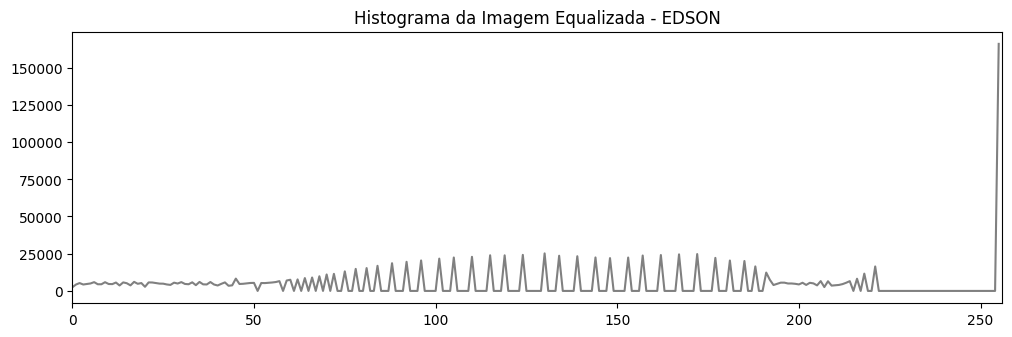

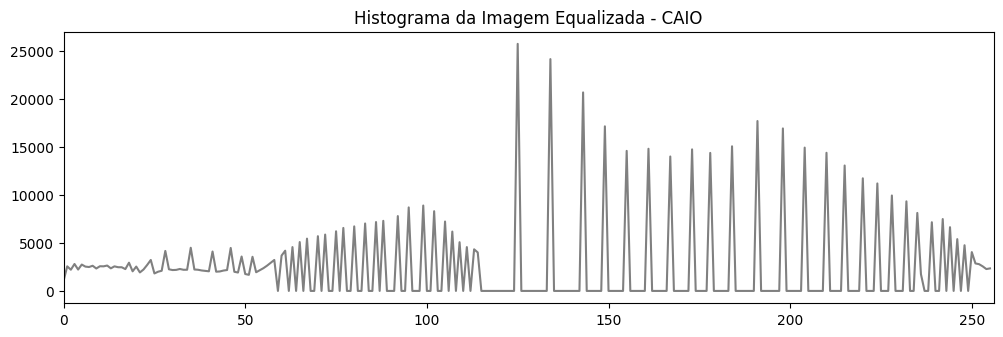

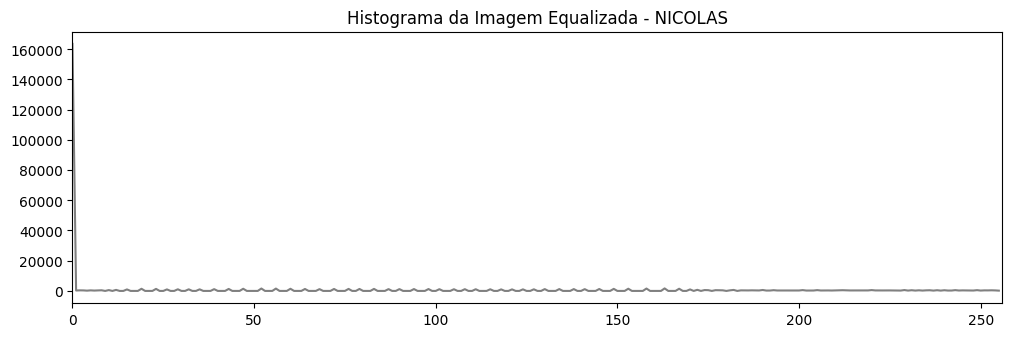

In [62]:
# 1. Calcular o histograma da imagem equalizada
hist_equalized1 = cv.calcHist([dst1], [0], None, [256], [0, 256])
hist_equalized2 = cv.calcHist([dst2], [0], None, [256], [0, 256])
hist_equalized3 = cv.calcHist([dst3], [0], None, [256], [0, 256])

##EDSON
# 2. Criar uma figura para o plot usando matplotlib.pyplot e definir um tamanho apropriado
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
# 3. Plotar o histograma calculado
plt.plot(hist_equalized1, color='gray')
# 4. Adicionar um título ao plot
plt.title('Histograma da Imagem Equalizada - EDSON')
# Definir limites para o eixo x
plt.xlim([0, 256])

##CAIO
# 2. Criar uma figura para o plot usando matplotlib.pyplot e definir um tamanho apropriado
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 2)
# 3. Plotar o histograma calculado
plt.plot(hist_equalized2, color='gray')
# 4. Adicionar um título ao plot
plt.title('Histograma da Imagem Equalizada - CAIO')
# Definir limites para o eixo x
plt.xlim([0, 256])

##NICOLAS
# 2. Criar uma figura para o plot usando matplotlib.pyplot e definir um tamanho apropriado
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 3)
# 3. Plotar o histograma calculado
plt.plot(hist_equalized3, color='gray')
# 4. Adicionar um título ao plot
plt.title('Histograma da Imagem Equalizada - NICOLAS')
# Definir limites para o eixo x
plt.xlim([0, 256])

# 6. Exibir o plot do histograma
plt.show()

##PARTE 2
 Estudo da equalização nas cores: Elabore outro programa modificando o código do item (1), porém sem converter para cinza, mas agora realizando a equalização nas três cores separadamente, e juntar os canais equalizados na imagem colorida de saída. Realize este experimento com três exemplo, podendo usar fotos de pessoas e objetos coloridos. Compare e analise o efeito sem e com a equalização de histograma no resultado da imagem colorida gerada e no histograma.

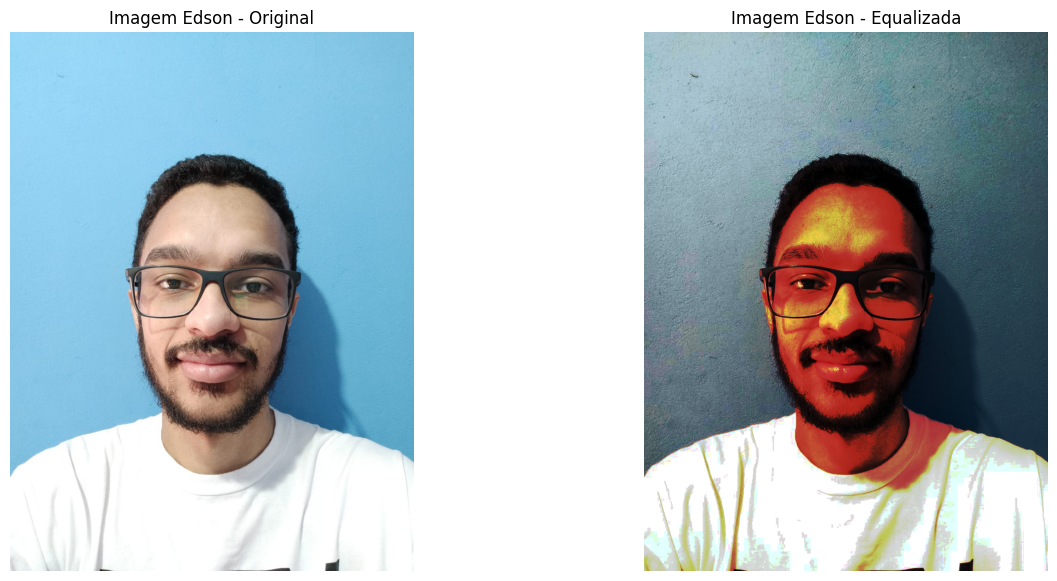

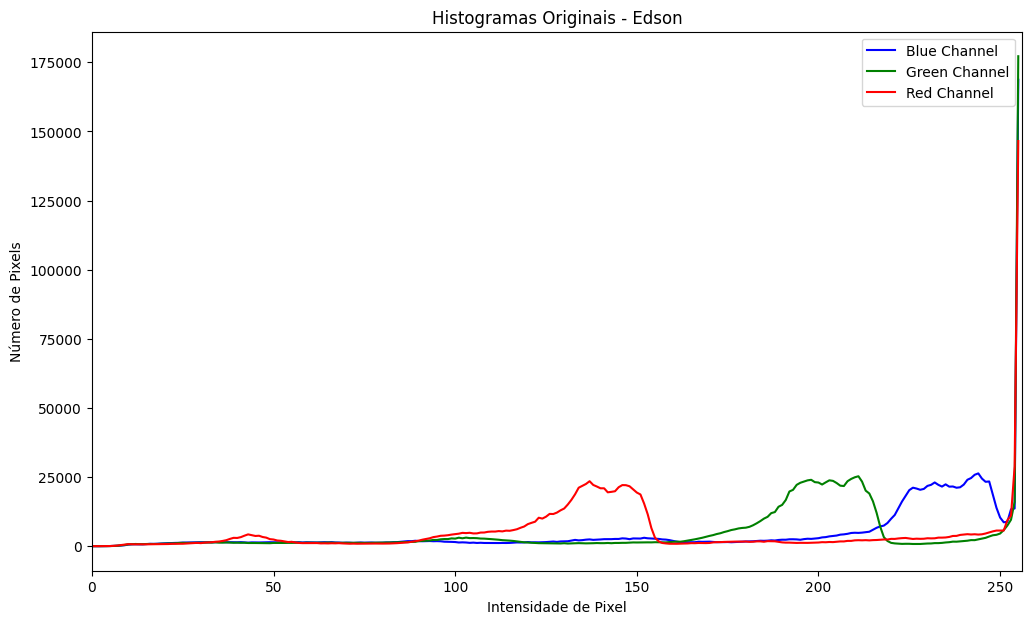

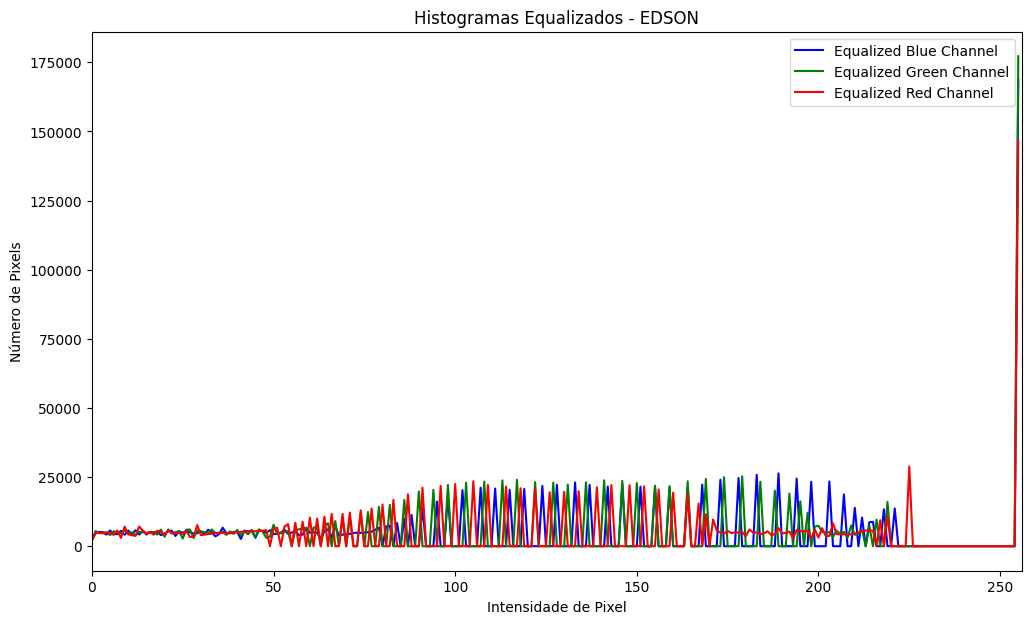

In [84]:
##EDSON

# Convert the RGB NumPy array to BGR format for OpenCV, then split channels
img_bgr1 = cv.cvtColor(img_np1, cv.COLOR_RGB2BGR)
b1, g1, r1 = cv.split(img_bgr1)


b1_eq = cv.equalizeHist(b1)
g1_eq = cv.equalizeHist(g1)
r1_eq = cv.equalizeHist(r1)

equalized_color_image1 = cv.merge([b1_eq, g1_eq, r1_eq])

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
# Use the NumPy array version of the original image (src_np) for display.
# src_np is already in RGB format (from PIL.Image to NumPy), so no BGR2RGB conversion is needed for matplotlib.
plt.imshow(img_np1)
plt.title('Imagem Edson - Original')
plt.axis('off')

plt.subplot(1, 2, 2)
# equalized_color_image is a NumPy array in BGR format, so convert to RGB for matplotlib.
plt.imshow(cv.cvtColor(equalized_color_image1, cv.COLOR_BGR2RGB))
plt.title('Imagem Edson - Equalizada')
plt.axis('off')

plt.show()

#HISTOGRAMAS
##ORIGINAL

hist_b1 = cv.calcHist([b1], [0], None, [256], [0, 256])
hist_g1 = cv.calcHist([g1], [0], None, [256], [0, 256])
hist_r1 = cv.calcHist([r1], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 7))

plt.plot(hist_b1, color='blue', label='Blue Channel')
plt.plot(hist_g1, color='green', label='Green Channel')
plt.plot(hist_r1, color='red', label='Red Channel')

plt.title('Histogramas Originais - Edson')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')
plt.xlim([0, 256])
plt.legend()
plt.show()

#HISTOGRAMAS
##EQUALIZADO

hist_b1_eq = cv.calcHist([b1_eq], [0], None, [256], [0, 256])
hist_g1_eq = cv.calcHist([g1_eq], [0], None, [256], [0, 256])
hist_r1_eq = cv.calcHist([r1_eq], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 7))

plt.plot(hist_b1_eq, color='blue', label='Equalized Blue Channel')
plt.plot(hist_g1_eq, color='green', label='Equalized Green Channel')
plt.plot(hist_r1_eq, color='red', label='Equalized Red Channel')

plt.title('Histogramas Equalizados - EDSON')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')
plt.xlim([0, 256])
plt.legend()
plt.show()


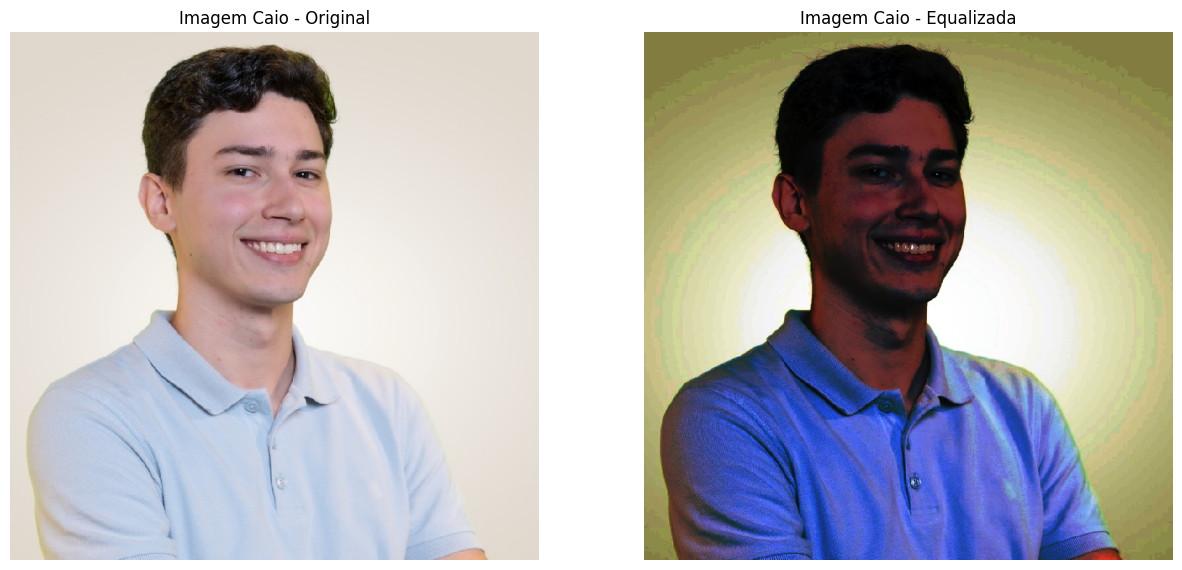

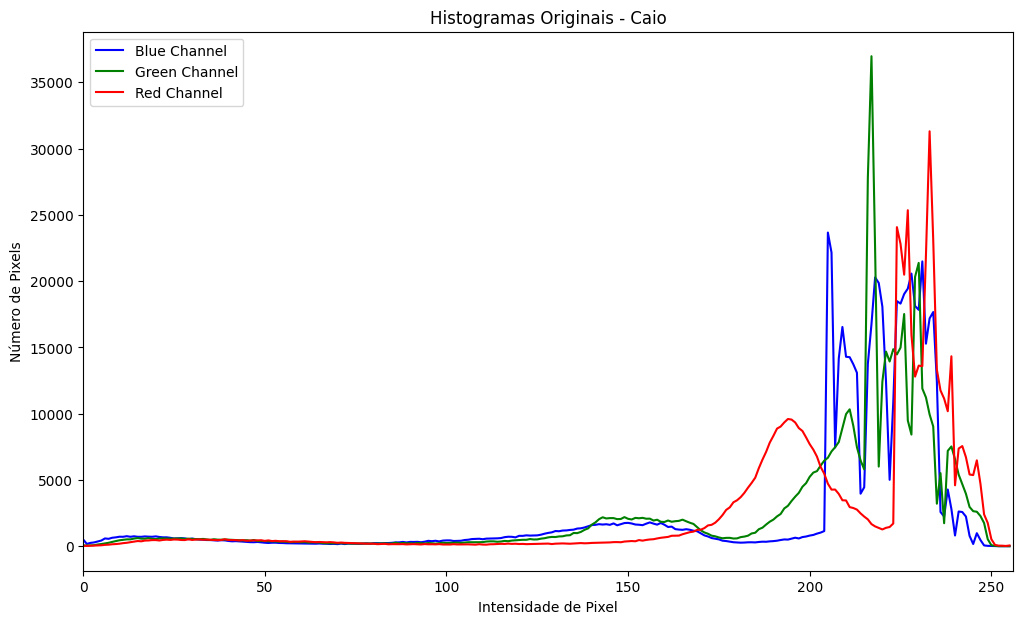

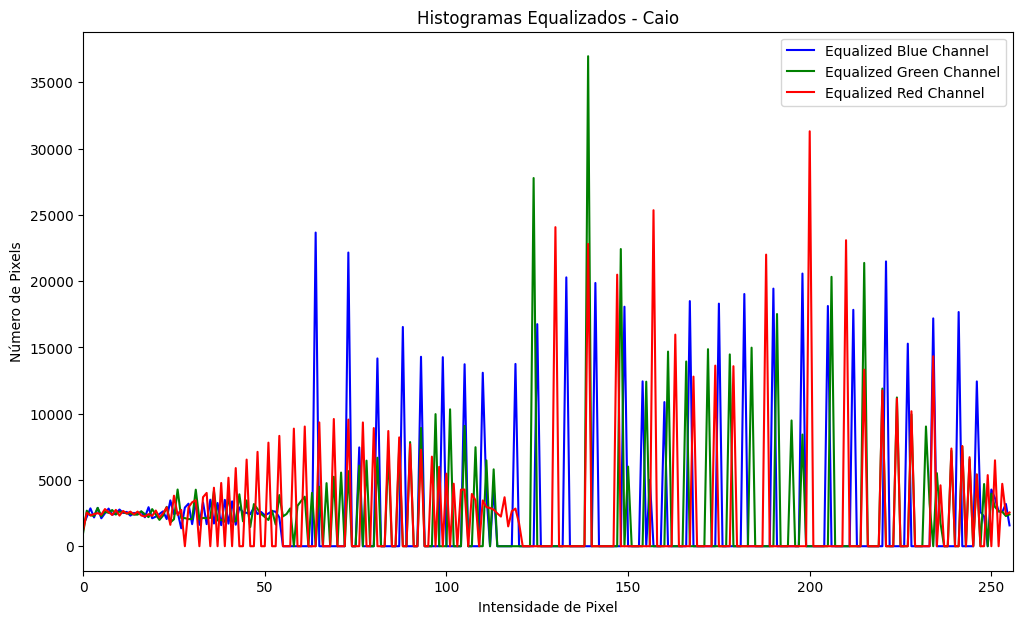

In [85]:
##CAIO

# Convert the RGB NumPy array to BGR format for OpenCV, then split channels
img_bgr2 = cv.cvtColor(img_np2, cv.COLOR_RGB2BGR)
b2, g2, r2 = cv.split(img_bgr2)


b2_eq = cv.equalizeHist(b2)
g2_eq = cv.equalizeHist(g2)
r2_eq = cv.equalizeHist(r2)

equalized_color_image2 = cv.merge([b2_eq, g2_eq, r2_eq])

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
# Use the NumPy array version of the original image (src_np) for display.
# src_np is already in RGB format (from PIL.Image to NumPy), so no BGR2RGB conversion is needed for matplotlib.
plt.imshow(img_np2)
plt.title('Imagem Caio - Original')
plt.axis('off')

plt.subplot(1, 2, 2)
# equalized_color_image is a NumPy array in BGR format, so convert to RGB for matplotlib.
plt.imshow(cv.cvtColor(equalized_color_image2, cv.COLOR_BGR2RGB))
plt.title('Imagem Caio - Equalizada')
plt.axis('off')

plt.show()

#HISTOGRAMAS
##ORIGINAIS

hist_b2 = cv.calcHist([b2], [0], None, [256], [0, 256])
hist_g2 = cv.calcHist([g2], [0], None, [256], [0, 256])
hist_r2 = cv.calcHist([r2], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 7))

plt.plot(hist_b2, color='blue', label='Blue Channel')
plt.plot(hist_g2, color='green', label='Green Channel')
plt.plot(hist_r2, color='red', label='Red Channel')

plt.title('Histogramas Originais - Caio')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')
plt.xlim([0, 256])
plt.legend()
plt.show()

#HISTOGRAMAS
##EQUALIZADO

hist_b2_eq = cv.calcHist([b2_eq], [0], None, [256], [0, 256])
hist_g2_eq = cv.calcHist([g2_eq], [0], None, [256], [0, 256])
hist_r2_eq = cv.calcHist([r2_eq], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 7))

plt.plot(hist_b2_eq, color='blue', label='Equalized Blue Channel')
plt.plot(hist_g2_eq, color='green', label='Equalized Green Channel')
plt.plot(hist_r2_eq, color='red', label='Equalized Red Channel')

plt.title('Histogramas Equalizados - Caio')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')
plt.xlim([0, 256])
plt.legend()
plt.show()

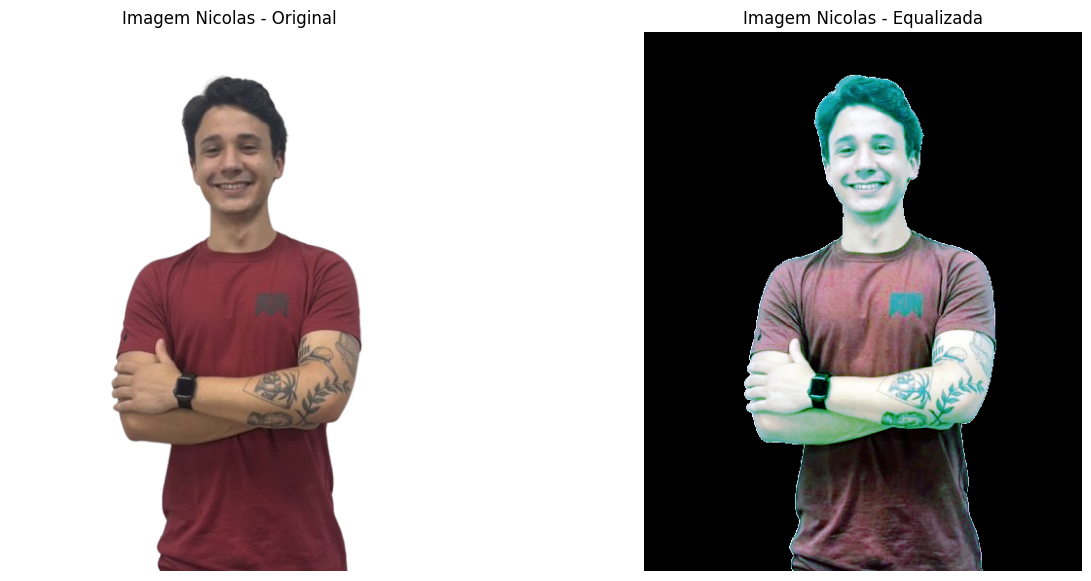

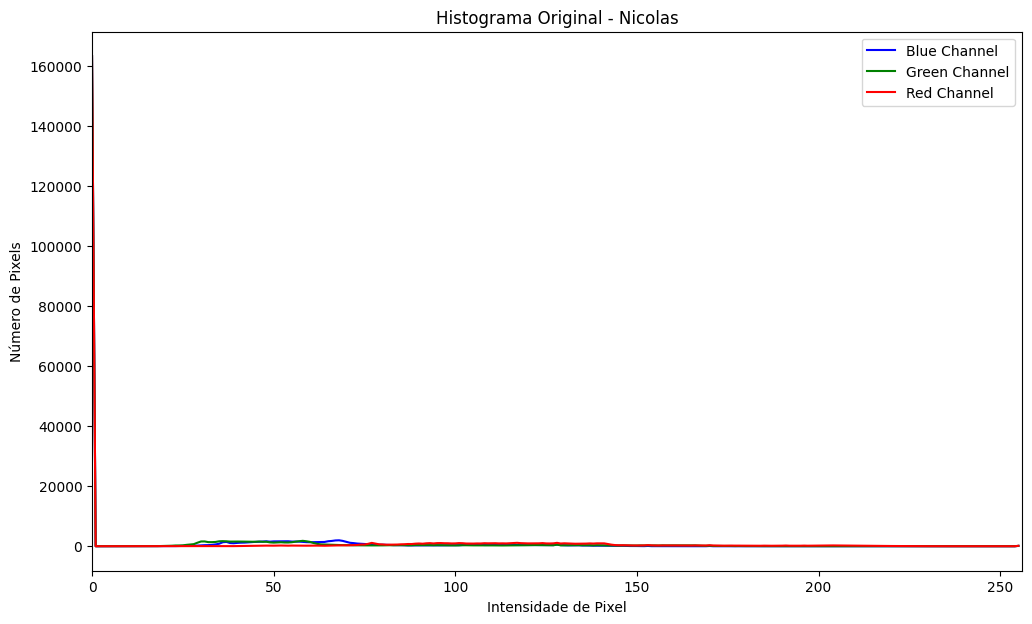

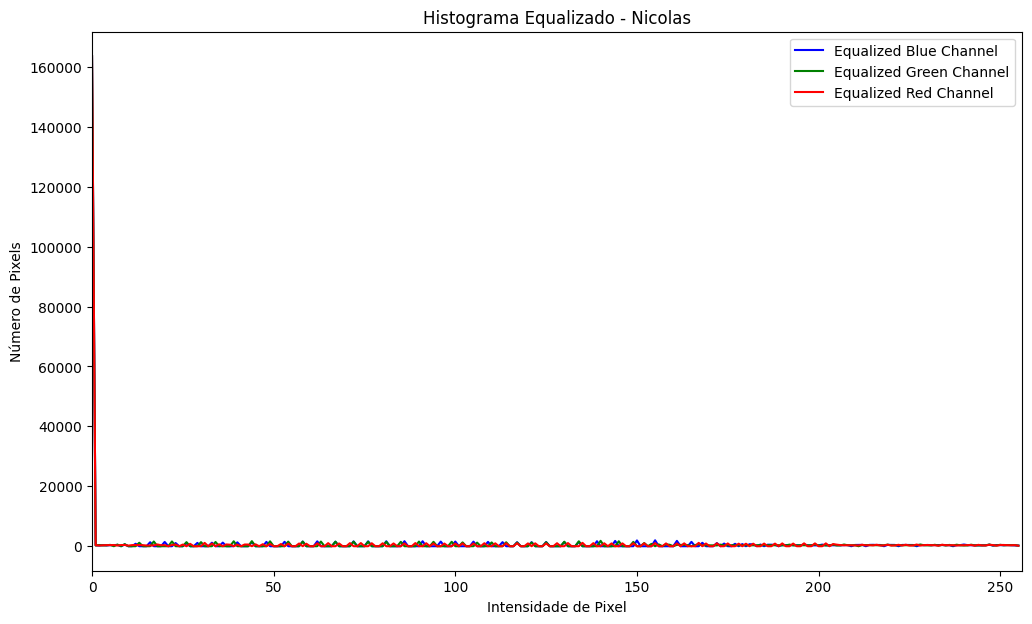

In [87]:
##NICOLAS

# Convert the RGB NumPy array to BGR format for OpenCV, then split channels
img_bgr3 = cv.cvtColor(img_np3, cv.COLOR_RGB2BGR)
b3, g3, r3 = cv.split(img_bgr3)


b3_eq = cv.equalizeHist(b3)
g3_eq = cv.equalizeHist(g3)
r3_eq = cv.equalizeHist(r3)

equalized_color_image3 = cv.merge([b3_eq, g3_eq, r3_eq])

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
# Use the NumPy array version of the original image (src_np) for display.
# src_np is already in RGB format (from PIL.Image to NumPy), so no BGR2RGB conversion is needed for matplotlib.
plt.imshow(img_np3)
plt.title('Imagem Nicolas - Original')
plt.axis('off')

plt.subplot(1, 2, 2)
# equalized_color_image is a NumPy array in BGR format, so convert to RGB for matplotlib.
plt.imshow(cv.cvtColor(equalized_color_image3, cv.COLOR_BGR2RGB))
plt.title('Imagem Nicolas - Equalizada')
plt.axis('off')

plt.show()

#HISTOGRAMAS
##ORIGINAL

hist_b3 = cv.calcHist([b3], [0], None, [256], [0, 256])
hist_g3 = cv.calcHist([g3], [0], None, [256], [0, 256])
hist_r3 = cv.calcHist([r3], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 7))

plt.plot(hist_b3, color='blue', label='Blue Channel')
plt.plot(hist_g3, color='green', label='Green Channel')
plt.plot(hist_r3, color='red', label='Red Channel')

plt.title('Histograma Original - Nicolas')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')
plt.xlim([0, 256])
plt.legend()
plt.show()

#HISTOGRAMAS
##EQUALIZADO

hist_b3_eq = cv.calcHist([b3_eq], [0], None, [256], [0, 256])
hist_g3_eq = cv.calcHist([g3_eq], [0], None, [256], [0, 256])
hist_r3_eq = cv.calcHist([r3_eq], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 7))

plt.plot(hist_b3_eq, color='blue', label='Equalized Blue Channel')
plt.plot(hist_g3_eq, color='green', label='Equalized Green Channel')
plt.plot(hist_r3_eq, color='red', label='Equalized Red Channel')

plt.title('Histograma Equalizado - Nicolas')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')
plt.xlim([0, 256])
plt.legend()
plt.show()

#RESUMO Pt2

A equalização de histograma com cv.equalizeHist é uma técnica poderosa para melhorar o contraste de imagens, espalhando as intensidades de pixel de forma mais uniforme. É crucial lembrar que cv.equalizeHist funciona apenas com imagens de canal único (tons de cinza).

As principais diferenças na aplicação são:

Em imagens em tons de cinza (padrão): Você primeiro converte a imagem colorida para cinza e, em seguida, aplica cv.equalizeHist. Isso resulta em uma melhoria de contraste direta na imagem em escala de cinza.

Em imagens coloridas (indiretamente): Como cv.equalizeHist não aceita cores, a abordagem é equalizar cada canal de cor (Azul, Verde, Vermelho) individualmente e depois mesclá-los de volta. Embora melhore o contraste em cada canal, esta técnica pode alterar significativamente o balanço de cores original, resultando em tonalidades que podem não ser naturais (como o exemplo do fundo amarelado). Para preservar as cores originais, outras abordagens seriam mais indicadas.
